In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


**Загрузка данных**

In [11]:
books=pd.read_csv("Books.csv", low_memory=False)
rating=pd.read_csv("Ratings.csv")
users=pd.read_csv("Users.csv")

In [5]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [69]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [70]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [17]:
print(books.shape)
print(rating.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [19]:
data=users.merge(rating,on='User-ID')

In [21]:
data

,User-ID,Location,Age,ISBN,Book-Rating
0,2,"stockton, california, usa",18.0,0195153448,0
1,7,"washington, dc, usa",NaN,034542252,0
2,8,"timmins, ontario, canada",NaN,0002005018,5
3,8,"timmins, ontario, canada",NaN,0060973129,0
4,8,"timmins, ontario, canada",NaN,0374157065,0
...,...,...,...,...,...
1149775,278854,"portland, oregon, usa",NaN,0425163393,7
1149776,278854,"portland, oregon, usa",NaN,0515087122,0
1149777,278854,"portland, oregon, usa",NaN,0553275739,6
1149778,278854,"portland, oregon, usa",NaN,0553578596,0


In [23]:
data=data.merge(books,on='ISBN')

In [25]:
data.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,8,"timmins, ontario, canada",NaN,0060973129,0,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,8,"timmins, ontario, canada",NaN,0374157065,0,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,8,"timmins, ontario, canada",NaN,0393045218,0,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1031136 non-null  int64  
 1   Location             1031136 non-null  object 
 2   Age                  753301 non-null   float64
 3   ISBN                 1031136 non-null  object 
 4   Book-Rating          1031136 non-null  int64  
 5   Book-Title           1031136 non-null  object 
 6   Book-Author          1031134 non-null  object 
 7   Year-Of-Publication  1031136 non-null  object 
 8   Publisher            1031134 non-null  object 
 9   Image-URL-S          1031136 non-null  object 
 10  Image-URL-M          1031136 non-null  object 
 11  Image-URL-L          1031132 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 94.4+ MB


**Обработка данных**

In [29]:
data.describe()

,User-ID,Age,Book-Rating
count,1.031136e+06,753301.000000,1.031136e+06
mean,1.405945e+05,37.397648,2.839051e+00
std,8.052466e+04,14.098254,3.854157e+00
min,2.000000e+00,0.000000,0.000000e+00
25%,7.041500e+04,28.000000,0.000000e+00
50%,1.412100e+05,35.000000,0.000000e+00
75%,2.114260e+05,45.000000,7.000000e+00
max,2.788540e+05,244.000000,1.000000e+01


In [31]:
df=data.copy()
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

In [33]:
df.drop(columns=["ISBN","Year-Of-Publication","Image-URL-S","Image-URL-M"],axis=1,inplace=True)
df.drop(index=df[df["Book-Rating"]==0].index,inplace=True)

In [35]:
df.shape

(269616, 8)

In [37]:
df.describe()

,User-ID,Age,Book-Rating
count,269616.000000,269616.000000,269616.000000
mean,138268.045454,36.835852,7.736143
std,78901.143075,13.753044,1.814535
min,19.000000,0.000000,1.000000
25%,72261.000000,28.000000,7.000000
50%,135265.000000,35.000000,8.000000
75%,206768.750000,45.000000,9.000000
max,278852.000000,244.000000,10.000000


In [78]:
import re  

df["Book-Title"] = df["Book-Title"].apply(lambda x: re.sub("[\W_]+", " ", x).strip())
df.head()

,User-ID,Location,Age,Book-Rating,Book-Title,Book-Author,Publisher,Image-URL-L
2,67544,"toronto, ontario, canada",30.0,8,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
6,219008,"halifax, nova scotia, canada",60.0,7,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
7,263325,"fredericton, new brunswick, canada",27.0,6,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
8,2954,"wichita, kansas, usa",71.0,8,Decision in Normandy,Carlo D'Este,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
9,152827,"ottawa, ontario, canada",40.0,7,Decision in Normandy,Carlo D'Este,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...


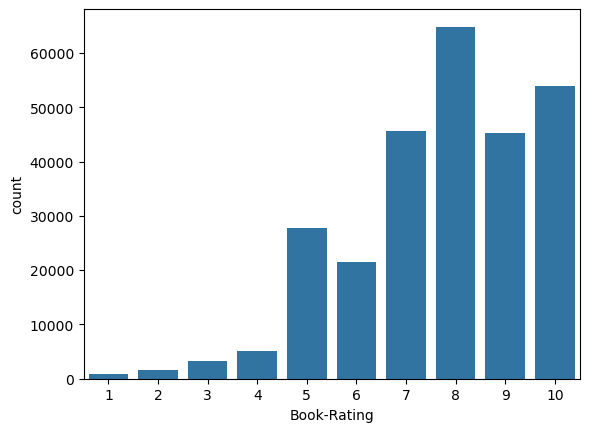

In [48]:
sns.countplot(data=df , x='Book-Rating')
plt.show()

**Система рекомендаций на основе взвешенных рейтингов**

Взвешенные: рекомендациям, полученным разными методами, присваивается различный вес – то есть, некоторые рекомендации считаются более предпочтительными, нежели другие.

In [51]:
avg_ratings = df.groupby('Book-Title')['Book-Rating'].mean().reset_index().rename(columns={'Book-Rating': 'avg_rating'})

avg=pd.DataFrame(avg_ratings).sort_values('avg_rating',ascending=False)

In [53]:
avg.head(10)

,Book-Title,avg_rating
54604,Mildred Pierce (Vintage Crime),10.0
94659,The Sports Encyclopedia,10.0
75744,Strange Eons,10.0
37392,Henry Babysits (A Parents magazine read aloud ...,10.0
75746,Strange Forces 3 (Strange Matter),10.0
94658,The Sporting News: Baseball Trivia Book,10.0
12328,"Branding in Asia: The Creation, Development, a...",10.0
37397,Henry Huggins (Morrow Junior Books),10.0
12325,Branded Hearts,10.0
64682,Premier de cordÃ?Â©e,10.0


In [61]:
df[df['Book-Title']=='Strange Forces 3 (Strange Matter)']

,User-ID,Location,Age,Book-Rating,Book-Title,Book-Author,Publisher,Image-URL-L
249194,96771,"springfield, virginia, usa",43.0,10,Strange Forces 3 (Strange Matter),Marty M. Engle,Frontline Publications,http://images.amazon.com/images/P/1567140866.0...


In [63]:
cnt_ratings = df.groupby('Book-Title')['Book-Rating'].count().reset_index().rename(columns={'Book-Rating': 'count_rating'})

cnt=pd.DataFrame(cnt_ratings).sort_values('count_rating',ascending=False)

In [65]:
cnt.head(10)

,Book-Title,count_rating
88962,The Lovely Bones: A Novel,473
106572,Wild Animus,473
82845,The Da Vinci Code,380
93717,The Secret Life of Bees,280
12631,Bridget Jones's Diary,261
6509,Angels &amp; Demons,258
49016,Life of Pi,252
90318,The Nanny Diaries: A Novel,246
36565,Harry Potter and the Chamber of Secrets (Book 2),246
92719,The Red Tent (Bestselling Backlist),227


In [71]:
popularite=avg.merge(cnt,on='Book-Title')

In [73]:
popularite.head(10)

,Book-Title,avg_rating,count_rating
0,Mildred Pierce (Vintage Crime),10.0,1
1,The Sports Encyclopedia,10.0,1
2,Strange Eons,10.0,1
3,Henry Babysits (A Parents magazine read aloud ...,10.0,1
4,Strange Forces 3 (Strange Matter),10.0,1
5,The Sporting News: Baseball Trivia Book,10.0,1
6,"Branding in Asia: The Creation, Development, a...",10.0,1
7,Henry Huggins (Morrow Junior Books),10.0,1
8,Branded Hearts,10.0,1
9,Premier de cordÃ?Â©e,10.0,1


In [75]:
popularite.tail(10)

,Book-Title,avg_rating,count_rating
109198,Remembered Rapture: The Writer at Work,1.0,1
109199,THUMBELINA: A Novel,1.0,1
109200,Theories of Personality: Understanding Persons...,1.0,1
109201,Amandote En Poesia,1.0,1
109202,S.A.S. des armes pour Khartoum,1.0,1
109203,Die Stimmen von Salem.,1.0,1
109204,"Convenient Proposal (Marry Me?) (Presents, 2118)",1.0,1
109205,"Easy Loving (Her Protector) (Intrigue , No 467)",1.0,1
109206,Prophecies: Visions of the World's Fate : Trut...,1.0,1
109207,The Time of the Hunter's Moon,1.0,1


In [77]:
v=popularite["count_rating"]
R=popularite["avg_rating"]
m=v.quantile(0.90)
c=R.mean()
popularite['w_score']=((v*R) + (m*c)) / (v+m)

In [79]:
popularite["count_rating"].describe()

count    109208.000000
mean          2.468830
std           6.911122
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         473.000000
Name: count_rating, dtype: float64

In [81]:
pop_sort=popularite.sort_values('w_score',ascending=False)

In [83]:
pop_sort

,Book-Title,avg_rating,count_rating,w_score
15957,Harry Potter and the Chamber of Secrets Postca...,9.842105,19,9.459927
16249,The Hobbit,9.526316,38,9.347103
17332,"The Return of the King (The Lord of the Rings,...",9.402439,82,9.320678
17375,"The Two Towers (The Lord of the Rings, Part 2)",9.370370,108,9.308735
15955,Dilbert: A Book of Postcards,9.900000,10,9.255595
...,...,...,...,...
105448,Coal: A Human History,4.764706,17,5.313254
105699,Confessions of a Sociopathic Social Climber : ...,4.416667,12,5.223645
105701,The Sexual Life of Catherine M.,4.357143,14,5.087685
108434,Black Coffee Blues,2.800000,5,4.953147


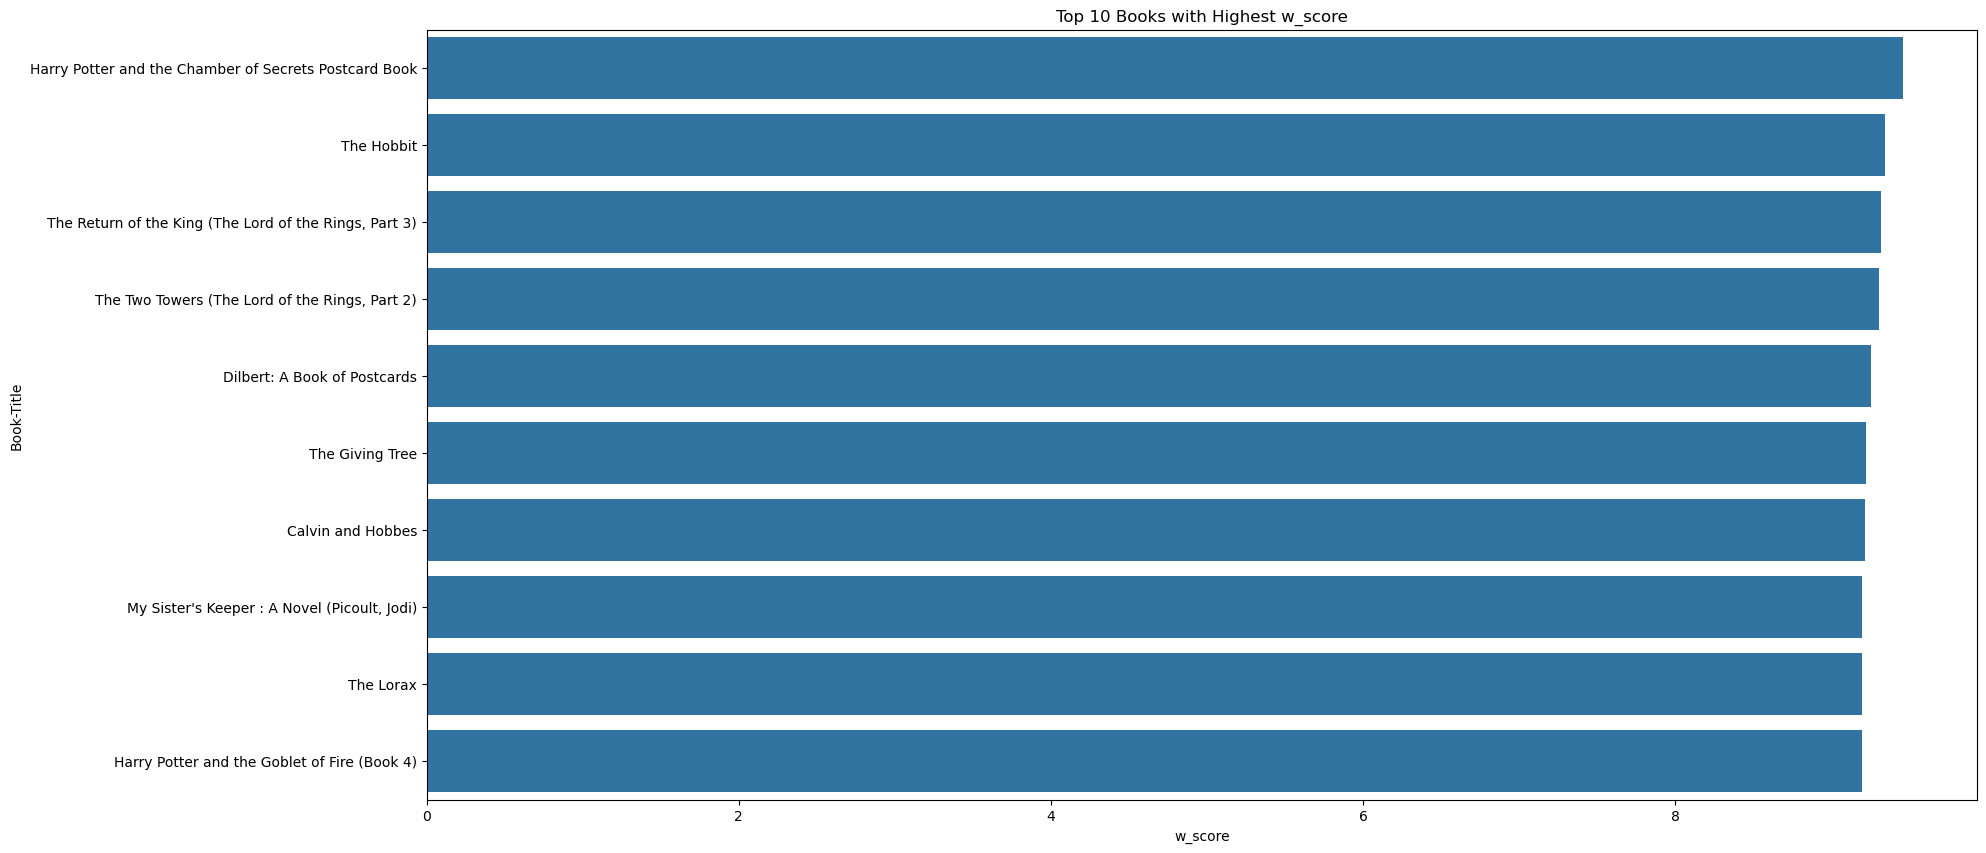

In [85]:
top_10_books = pop_sort.head(10)

plt.figure(figsize=(20, 10))
sns.barplot(x='w_score', y='Book-Title', data=top_10_books)
plt.xlabel('w_score')
plt.ylabel('Book-Title')
plt.title('Top 10 Books with Highest w_score')
plt.show()

**Cистема рекомендаций по коллаборативной фильтрации (с использованием корреляции)**

In [87]:
new_df=df[df['User-ID'].map(df['User-ID'].value_counts()) > 200]  

In [89]:
new_df

,User-ID,Location,Age,Book-Rating,Book-Title,Book-Author,Publisher,Image-URL-L
7841,4385,"albq, new mexico, usa",33.0,10,The Bandit's Lady (Harper Monogram),Maureen Child,Harper Mass Market Paperbacks (Mm),http://images.amazon.com/images/P/0061083402.0...
7843,4385,"albq, new mexico, usa",33.0,9,Fault Lines,Anne Rivers Siddons,HarperTorch,http://images.amazon.com/images/P/0061093343.0...
7844,4385,"albq, new mexico, usa",33.0,10,Society of the Mind: A Cyberthriller,Eric L. Harry,Harper Mass Market Paperbacks (Mm),http://images.amazon.com/images/P/0061096156.0...
7846,4385,"albq, new mexico, usa",33.0,10,Die Hard: With a Vengeance - A Novel,D. Chiel,St Martins Pr,http://images.amazon.com/images/P/0312956762.0...
7847,4385,"albq, new mexico, usa",33.0,10,Circle of Stars,Anna Lee Waldo,St. Martin's Paperbacks,http://images.amazon.com/images/P/0312980353.0...
...,...,...,...,...,...,...,...,...
743159,274061,"gahanna/columbus, ohio, usa",26.0,10,"Cardcaptor Sakura, Number 5",Clamp,Tokyopop,http://images.amazon.com/images/P/1892213737.0...
743160,274061,"gahanna/columbus, ohio, usa",26.0,10,Clover #2,Clamp,Tokyopop,http://images.amazon.com/images/P/189221394X.0...
743161,274061,"gahanna/columbus, ohio, usa",26.0,10,Clover #3,Clamp,Tokyopop,http://images.amazon.com/images/P/1892213958.0...
743162,274061,"gahanna/columbus, ohio, usa",26.0,10,"Clover (Clover, 4)",Clamp,TokyoPop,http://images.amazon.com/images/P/1892213966.0...


In [91]:
users_pivot=new_df.pivot_table(index=["User-ID"],columns=["Book-Title"],values="Book-Rating")
users_pivot.fillna(0,inplace=True)

In [93]:
users_pivot.head()

Book-Title,Dark Justice,Final Fantasy Anthology: Official Strategy Guide (Brady Games),"Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",Highland Desire (Zebra Splendor Historical Romances),Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),Nonbook Materials: The Organization of Integrated Collections,"Q-Space (Star Trek The Next Generation, Book 47)",This Place Has No Atmosphere (Laurel-Leaf Books),Weird News Stories,!Arriba! Comunicacion y cultura,...,and the shadows took him : A Novel,christmas on snowbird mountain,e,good girls do: Sex Chronicles of a Shameless Generation,one hundred years of solitude,operation : mistletoe (the special agents),stardust,the Dark Light Years,together by christmas,Â¿Eres tu mi mamÃ¡?/Are You My Mother?
User-ID,,,,,,,,,,,,,,,,,,,,,
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
def same_books(book):
    users_vote_book=users_pivot[book]
    similar_with=users_pivot.corrwith(users_vote_book)
    similar_with = pd.DataFrame(similar_with, columns=['correlation'])
    print(similar_with)
    df=similar_with.sort_values('correlation',ascending=False).head(10)
    print(df)
    df_sort=df[df['correlation']>0.8]
    return df_sort

In [101]:
same_books('Circle of Stars')

                                                    correlation
Book-Title                                                     
 Dark Justice                                          0.664117
 Final Fantasy Anthology: Official Strategy Gui...    -0.016713
 Good Wives: Image and Reality in the Lives of ...    -0.016713
 Highland Desire (Zebra Splendor Historical Rom...    -0.016713
 Murder of a Sleeping Beauty (Scumble River Mys...     0.488123
...                                                         ...
operation : mistletoe  (the special agents)            0.664117
stardust                                              -0.029249
the Dark Light Years                                  -0.016713
together by christmas                                  0.664117
Â¿Eres tu mi mamÃ¡?/Are You My Mother?                -0.016713

[28742 rows x 1 columns]
                                                    correlation
Book-Title                                                     
Circle of Star

,correlation
Book-Title,
Circle of Stars,1.000000
"Most Eligible Doctor (Silhouette Romance, 1692)",0.998585
When It's Perfect (Avon Romantic Treasures),0.998275


**Коллаборативная фильтрация: модель NearestNeighbours из scikit-learn для вашей системы рекомендаций**

Коллаборативная фильтрация — популярный метод построения систем рекомендаций, основанных на предпочтениях и поведении пользователей. 
Методы коллаборативной фильтрации дают рекомендации, используя шаблоны и отношения между пользователями и объектами.

Коллаборативная фильтрация на основе пользователей. Этот подход идентифицирует пользователей, похожих на целевого пользователя, на основе их предпочтений, а затем рекомендует элементы, которые понравились этим похожим пользователям. Предполагается, что если пользователи A и B имели схожие предпочтения в прошлом, то то, что нравится одному из них, может понравиться и другому.

In [103]:
df.head()

,User-ID,Location,Age,Book-Rating,Book-Title,Book-Author,Publisher,Image-URL-L
2,19,"weston, ,",14.0,7,Prague : A Novel,ARTHUR PHILLIPS,Random House Trade Paperbacks,http://images.amazon.com/images/P/0375759778.0...
5,42,"appleton, wisconsin, usa",17.0,7,From the Corner of His Eye,Dean Koontz,Bantam Books,http://images.amazon.com/images/P/0553582747.0...
8,44,"black mountain, north carolina, usa",51.0,8,This Year It Will Be Different: And Other Stories,Maeve Binchy,Dell,http://images.amazon.com/images/P/0440223571.0...
11,51,"renton, washington, usa",34.0,9,The Street Lawyer,JOHN GRISHAM,Dell,http://images.amazon.com/images/P/0440225701.0...
12,56,"cheyenne, wyoming, usa",24.0,7,LONESOME DOVE,Larry McMurtry,Pocket,http://images.amazon.com/images/P/0671623249.0...


In [105]:
users_pivot

Book-Title,Dark Justice,Final Fantasy Anthology: Official Strategy Guide (Brady Games),"Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",Highland Desire (Zebra Splendor Historical Romances),Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),Nonbook Materials: The Organization of Integrated Collections,"Q-Space (Star Trek The Next Generation, Book 47)",This Place Has No Atmosphere (Laurel-Leaf Books),Weird News Stories,!Arriba! Comunicacion y cultura,...,and the shadows took him : A Novel,christmas on snowbird mountain,e,good girls do: Sex Chronicles of a Shameless Generation,one hundred years of solitude,operation : mistletoe (the special agents),stardust,the Dark Light Years,together by christmas,Â¿Eres tu mi mamÃ¡?/Are You My Mother?
User-ID,,,,,,,,,,,,,,,,,,,,,
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
265889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
269566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
from scipy.sparse import csr_matrix
import numpy as np
from sklearn.neighbors import NearestNeighbors
import pandas as pd


book_df_matrix = csr_matrix(users_pivot.values)

def find_similar_books(book_name, num_neighbors=10):
    # Initialize the NearestNeighbors model
    model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
    model_knn.fit(book_df_matrix)
    
    # Find the index of the input book
    book_index = users_pivot.columns.get_loc(book_name)
    
    # Query the nearest neighbors
    distances, indices = model_knn.kneighbors(book_df_matrix[book_index], n_neighbors=num_neighbors+1)
    # Exclude the first index (which is the input book itself)
    similar_indices = indices[0][1:]
    
    # Get the names of similar books based on indices
    list_similar_books = [users_pivot.columns[idx] for idx in similar_indices]
    similar_books=pd.DataFrame({"Similar books to":list_similar_books})
    return similar_books



In [119]:
# Example usage
input_book = "100 Ways to Motivate Yourself"  
find_similar_books(input_book)

,Similar books to
0,100 hikes in the North Cascades: Mt. Baker are...
1,Highland Desire (Zebra Splendor Historical Ro...
2,10 Lb. Penalty
3,101 Silly Summertime Jokes
4,1001 Hints &amp; Tips for Your Garden : An Ind...
5,1001 Things Everyone Should Know About the South
6,101 Word Games for Students of English As a Se...
7,100 Things I'm Not Going to Do Now That I'm ov...
8,!Arriba! Comunicacion y cultura
9,"!Trato hecho!: Spanish for Real Life, Combined..."


In [121]:
input_book = "10 Lb. Penalty"  
find_similar_books(input_book)

,Similar books to
0,100 Ways to Motivate Yourself
1,100 hikes in the North Cascades: Mt. Baker are...
2,175 Amazing Nature Experiments
3,101 Best Family Card Games
4,1999 Writer's Market (Annual)
5,1001 Hints &amp; Tips for Your Garden : An Ind...
6,"2,100 Victorian Monograms (Dover Pictorial Arc..."
7,1001 Things Everyone Should Know About the South
8,100 Great Operas and Their Stories
9,!Arriba! Comunicacion y cultura


In [123]:
def find_favorite_books(User_id, num_books=10):
    # Initialize the NearestNeighbors model
    model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
    model_knn.fit(book_df_matrix)
    
    # Find the index of the input user
    user_index = users_pivot.index.get_loc(User_id)
    
    # Query the nearest neighbors
    distances, indices = model_knn.kneighbors(book_df_matrix[user_index], n_neighbors=num_books+1)
    # Exclude the first index (which is the input user's own preferences)
    favorite_indices = indices[0][1:]
    
    # Get the names of favorite books based on indices
    list_favorite_books = [users_pivot.columns[idx] for idx in favorite_indices]
    favorite_books=pd.DataFrame({"favorite books ":list_favorite_books})
    return favorite_books



In [125]:
# Example usage
User_id= 13552  
find_favorite_books(User_id)

,favorite books
0,100 Ways to Motivate Yourself
1,101 Best Family Card Games
2,100 hikes in the North Cascades: Mt. Baker are...
3,Nonbook Materials: The Organization of Integr...
4,1001 Hints &amp; Tips for Your Garden : An Ind...
5,"1000 Play Thinks: Puzzles, Paradoxes, Illusion..."
6,"!Trato hecho!: Spanish for Real Life, Combined..."
7,1001 Things Everyone Should Know About the South
8,'G' Is for Grafton : The World of Kinsey Millhone
9,175 Amazing Nature Experiments


**Косинусное сходство**

In [127]:
users_pivot.head()

Book-Title,Dark Justice,Final Fantasy Anthology: Official Strategy Guide (Brady Games),"Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",Highland Desire (Zebra Splendor Historical Romances),Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),Nonbook Materials: The Organization of Integrated Collections,"Q-Space (Star Trek The Next Generation, Book 47)",This Place Has No Atmosphere (Laurel-Leaf Books),Weird News Stories,!Arriba! Comunicacion y cultura,...,and the shadows took him : A Novel,christmas on snowbird mountain,e,good girls do: Sex Chronicles of a Shameless Generation,one hundred years of solitude,operation : mistletoe (the special agents),stardust,the Dark Light Years,together by christmas,Â¿Eres tu mi mamÃ¡?/Are You My Mother?
User-ID,,,,,,,,,,,,,,,,,,,,,
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
from sklearn.metrics.pairwise import cosine_similarity 

In [131]:
similarity_score = cosine_similarity(users_pivot.T)

In [132]:
similarity_score.shape

(28742, 28742)

In [137]:
similarity_score

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [139]:
users_pivot2 = users_pivot.T

In [141]:
def recommend(book_name):
    index = np.where(users_pivot2.index==book_name)[0][0]
    similar_books = sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1], reverse=True)[1:11]
    
    data = []
    
    for i in similar_books:
        item = []
        temp_df = books[books['Book-Title'] == users_pivot2.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    return data

In [143]:
recommend("Message in a Bottle")

[['Evergreen',
  'Belva Plain',
  'http://images.amazon.com/images/P/0440132789.01.MZZZZZZZ.jpg'],
 ['Happy Are Those Who Thirst for Justice',
  'Andrew M. Greeley',
  'http://images.amazon.com/images/P/0446349461.01.MZZZZZZZ.jpg'],
 ['Sick Puppy',
  'Carl Hiaasen',
  'http://images.amazon.com/images/P/0446604666.01.MZZZZZZZ.jpg'],
 ['Destiny',
  'Flavia',
  'http://images.amazon.com/images/P/0768322413.01.MZZZZZZZ.jpg'],
 ['PETALS ON WIND',
  'V. C. Andrews',
  'http://images.amazon.com/images/P/0671829777.01.MZZZZZZZ.jpg'],
 ['The Notebook',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446605239.01.MZZZZZZZ.jpg'],
 ['Pay It Forward',
  'Catherine Ryan Hyde',
  'http://images.amazon.com/images/P/0743412028.01.MZZZZZZZ.jpg'],
 ['Nightmares &amp; Dreamscapes',
  'Stephen King',
  'http://images.amazon.com/images/P/0451180232.01.MZZZZZZZ.jpg'],
 ['Silver Wedding',
  'Maeve Binchy',
  'http://images.amazon.com/images/P/0440207770.01.MZZZZZZZ.jpg'],
 ['The Christmas Story (A 

In [145]:
recommend("The Notebook")

[['The Rescue',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446610399.01.MZZZZZZZ.jpg'],
 ['A Walk to Remember',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446608955.01.MZZZZZZZ.jpg'],
 ['Wish You Well',
  'David Baldacci',
  'http://images.amazon.com/images/P/0446527165.01.MZZZZZZZ.jpg'],
 ['The Celestine Prophecy (Celestine Prophecy)',
  'James Redfield',
  'http://images.amazon.com/images/P/044651862X.01.MZZZZZZZ.jpg'],
 ['Message in a Bottle',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446523569.01.MZZZZZZZ.jpg'],
 ['Chicken Soup for the Soul at Work (Chicken Soup for the Soul Series (Paper))',
  'Jack Canfield',
  'http://images.amazon.com/images/P/155874424X.01.MZZZZZZZ.jpg'],
 ['Snow White and the Seven Dwarfs',
  'Little Golden Staff',
  'http://images.amazon.com/images/P/0307010368.01.MZZZZZZZ.jpg'],
 ['PETALS ON WIND',
  'V. C. Andrews',
  'http://images.amazon.com/images/P/0671829777.01.MZZZZZZZ.jpg'],
 ['Timepiece',
  'Richard 

In [147]:
recommend("1984")

[['The Tale of the Body Thief (Vampire Chronicles (Paperback))',
  'Anne Rice',
  'http://images.amazon.com/images/P/034538475X.01.MZZZZZZZ.jpg'],
 ['Waiting',
  'Frank M. Robinson',
  'http://images.amazon.com/images/P/0812541642.01.MZZZZZZZ.jpg'],
 ['Fahrenheit 451',
  'Ray Bradbury',
  'http://images.amazon.com/images/P/3257208626.01.MZZZZZZZ.jpg'],
 ['Lying Awake',
  'Mark Salzman',
  'http://images.amazon.com/images/P/0375406328.01.MZZZZZZZ.jpg'],
 ["NEW ROADSIDE AMERICA : THE MODERN TRAVELER'S GUIDE TO THE WILD AND WONDERFUL WORLD OF AMERICA'S TOURIST",
  'Doug Kirby',
  'http://images.amazon.com/images/P/0671769316.01.MZZZZZZZ.jpg'],
 ['The Catcher in the Rye',
  'J.D. Salinger',
  'http://images.amazon.com/images/P/0316769487.01.MZZZZZZZ.jpg'],
 ['Absalom, Absalom!: The Corrected Text (Vintage International)',
  'William Faulkner',
  'http://images.amazon.com/images/P/0679732187.01.MZZZZZZZ.jpg'],
 ["The Only Astrology Book You'll Ever Need",
  'Joanna Martine Woolfolk',
  'htt

In [149]:
recommend("100 Ways to Motivate Yourself")

[['50 Great Ghost Stories',
  'John Canning',
  'http://images.amazon.com/images/P/0517136708.01.MZZZZZZZ.jpg'],
 ["50 Things You're Not Supposed to Know",
  'Russ Kick',
  'http://images.amazon.com/images/P/0971394288.01.MZZZZZZZ.jpg'],
 ['999: New Stories of Horror and Suspense',
  'Al Sarrantonio',
  'http://images.amazon.com/images/P/0380977400.01.MZZZZZZZ.jpg'],
 ['A Baby Sister for Frances',
  'Russell Hoban',
  'http://images.amazon.com/images/P/0064430065.01.MZZZZZZZ.jpg'],
 ['A Fair Wind for Troy (Greek Myths Series)',
  'Doris Gates',
  'http://images.amazon.com/images/P/014031718X.01.MZZZZZZZ.jpg'],
 ['A Field Guide to Little-Known and Seldom-Seen Birds of North America',
  'Ben Sill',
  'http://images.amazon.com/images/P/0934601585.01.MZZZZZZZ.jpg'],
 ['A Fool and His Bunny: The Art of Will Bullas',
  'Will Bullas',
  'http://images.amazon.com/images/P/0867130199.01.MZZZZZZZ.jpg'],
 ['A Hell of a Woman (Vintage Crime/Black Lizard)',
  'Jim Thompson',
  'http://images.amazon